# We are understanding the data by looking at the well's easting, northing, frac stages, and lengths

In [4]:

import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import LinearRegression
import glob


Brisket 1-204H.csv is at 86600.0 eastings and 33900.0 northings.
Brisket 1-204H.csv is 4536.0 feet long.
There are 50 frac stages

Brisket 1-44H.csv is at 1900.0 eastings and 3900.0 northings.
Brisket 1-44H.csv is 8435.0 feet long.
There are 11 frac stages

Brisket 10-65H.csv is at 80100.0 eastings and 14400.0 northings.
Brisket 10-65H.csv is 6006.0 feet long.
There are 50 frac stages

Brisket 2-149H.csv is at 82600.0 eastings and 62100.0 northings.
Brisket 2-149H.csv is 6622.0 feet long.
There are 50 frac stages

Brisket 3-212H.csv is at 17700.0 eastings and 43000.0 northings.
Brisket 3-212H.csv is 8230.0 feet long.
There are 25 frac stages

Brisket 6-50H.csv is at 4200.0 eastings and 83000.0 northings.
Brisket 6-50H.csv is 5815.0 feet long.
There are 50 frac stages

Brisket 7-105H.csv is at 37100.0 eastings and 1700.0 northings.
Brisket 7-105H.csv is 8634.0 feet long.
There are 5 frac stages

Brisket 7-212H.csv is at 75500.0 eastings and 28400.0 northings.
Brisket 7-212H.csv is 6703.

Sugar 1-146H.csv is at 5600.0 eastings and 8100.0 northings.
Sugar 1-146H.csv is 8956.0 feet long.
There are 34 frac stages

Sundae 1-129H.csv is at 84100.0 eastings and 70900.0 northings.
Sundae 1-129H.csv is 9371.0 feet long.
There are 34 frac stages

Sundae 1-163H.csv is at 56200.0 eastings and 35600.0 northings.
Sundae 1-163H.csv is 5120.0 feet long.
There are 50 frac stages

Sundae 14-192H.csv is at 53800.0 eastings and 34100.0 northings.
Sundae 14-192H.csv is 5885.0 feet long.
There are 17 frac stages

Sundae 2-159H.csv is at 12700.0 eastings and 9200.0 northings.
Sundae 2-159H.csv is 6445.0 feet long.
There are 50 frac stages

Sundae 2-27H.csv is at 76000.0 eastings and 51600.0 northings.
Sundae 2-27H.csv is 6322.0 feet long.
There are 9 frac stages

Sundae 7-180H.csv is at 5500.0 eastings and 16500.0 northings.
Sundae 7-180H.csv is 9692.0 feet long.
There are 8 frac stages

Sundae 7-185H.csv is at 83100.0 eastings and 73300.0 northings.
Sundae 7-185H.csv is 8721.0 feet long.
Th

Text(0, 0.5, 'northing')

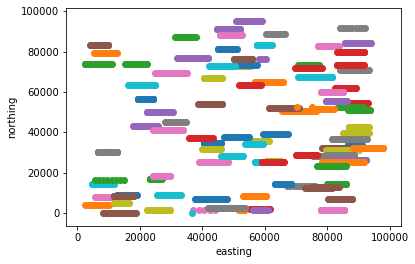

In [18]:
for elem in os.listdir("Data"):
    if elem != "well production.csv":
        df = pd.read_csv("Data/" + elem)
        print(elem + " is at " + str(df["easting"].min()) + " eastings and " + str(df["northing"].min()) + " northings." )
        print(elem + " is " + str(df["easting"].max() - df["easting"].min()) + " feet long." )
        df = df.dropna(subset=['proppant weight (lbs)'])
        print("There are " + str(len(df["proppant weight (lbs)"])) + " frac stages")
        print()
        plt.scatter(df["easting"], df["northing"])
        
plt.xlabel("easting")
plt.ylabel("northing")


# These are the calculations for original oil in place and recoverable reserves using the given data for each well

In [19]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import os
import math

In [20]:
#I made lists of all of the data for each well respectively and plotted some of them to look at how the data correlates
lengthsOfWells = []
oilSaturationAverage = []
thickness = []
waterSaturation = []
permeability = []
porosity = []
Young = []
names = []
poisson = []
northing = []
easting = []

# making a list of the means of each category for each well 
for elem in os.listdir("Data"):
    if elem != "well production.csv":
        df = pd.read_csv("Data/" + elem)
        oilSaturationAverage.append(df["oil saturation"].values.mean())
        thickness.append(df["thickness (ft)"].values.mean())
        waterSaturation.append(df["water saturation"].values.mean())
        permeability.append(df["permeability"].values.mean())
        porosity.append(df["porosity"].values.mean())
        Young.append(df["Young's Modulus"].values.mean())
        lengthsOfWells.append(df.iloc[-1][0] - df.iloc[0][0])
        poisson.append(df["Poisson's ratio"].values.mean())
        northing.append(df["northing"].values.mean())
        easting.append(df["easting"].values.mean())
        names.append(elem)
        
        
# making a compiled dataframe that contains the data for all 100 wells        
dfCompiled = pd.DataFrame(list(zip(names, northing, easting, lengthsOfWells, thickness, porosity, permeability, waterSaturation, Young, oilSaturationAverage, poisson)),
                          columns =["Name", "northing", "CENTER of easting", 'Length', 'Thickness', "Porosity", "Permeability", "water saturation", "Young's modulus", "oil saturation", "poisson's ratio"])


# getting data (pressure and recovery factor) from the well production.csv
dfWellProduction = pd.read_csv("Data/well production.csv")
dfWellProduction = dfWellProduction.sort_values(by=["well name"])
dfWellProduction = dfWellProduction.reset_index(drop=True)


dfCompiled['average pressure (Pa)'] = dfWellProduction['average pressure (Pa)']
dfCompiled['recovery factor'] = dfWellProduction["recovery factor"]



                         
              

In [22]:
# now doing the calculations

# calculating E' (where E is Young's modulus and v is poisson's ratio)
def E_prime(E, v):
    return E / (1 - pow(v,2))

# calculating b = half minor axis of an ellipse (we are using the max fracture width divided by 2 to estimate b)
# where H is the thickness in feet and p is the average pressure

def b(H, E_prime, p):
    return (H * p) / E_prime

# where L is the length of the well and b is the half minor axis of an ellipse
def areaMethod1(L, b):
  return (L * 2 * b + math.pi * b * b) / 43560  

#second area function
def areaMethod2(L, b):
    return (math.pi * (L / 2 + b) * b) / 43560
# the original oil in place formula where A is area (in acres), H is thickness, por is porosity, s is water saturation, 
# and fvf is formation volume factor
def oil_in_place(A, H, por, s):
    return (7758 * A * H * por * (1 - s)) / 1.6

# calculate recoverable reserves where OOIP is the original oil in place and rf is the recovery factor
def r_r(OOIP, rf):
    return OOIP * rf
    

dfCompiled["E prime calculation"] = E_prime(dfCompiled["Young's modulus"], dfCompiled["poisson's ratio"])
dfCompiled["b calculation"] = b(dfCompiled["Thickness"], dfCompiled["E prime calculation"], dfCompiled["average pressure (Pa)"])
dfCompiled["Area method one"] = areaMethod1(dfCompiled["Length"], dfCompiled["b calculation"])
dfCompiled["Area method two"] = areaMethod2(dfCompiled["Length"], dfCompiled["b calculation"])
dfCompiled["Area average"] = (dfCompiled["Area method one"] + dfCompiled["Area method two"])/2
dfCompiled["original oil in place"] = oil_in_place(dfCompiled["Area average"], dfCompiled["Thickness"], 
                                                   dfCompiled["Porosity"], dfCompiled["water saturation"])
dfCompiled["recoverable reserves"] = r_r(dfCompiled["original oil in place"], dfCompiled["recovery factor"])
dfCompiled.head()
display(dfCompiled)  


,Name,northing,CENTER of easting,Length,Thickness,Porosity,Permeability,water saturation,Young's modulus,oil saturation,poisson's ratio,average pressure (Pa),recovery factor,E prime calculation,b calculation,Area method one,Area method two,Area average,original oil in place,recoverable reserves
0,Brisket 1-204H.csv,33900.0,88867.87,4536.0,40.849003,0.0611,0.01566,0.062545,1.062235e+07,0.937455,0.30400,35023133,0.107214,1.170399e+07,122.236998,26.535247,21.071994,23.803621,2.700510e+05,28953.336495
1,Brisket 1-44H.csv,3900.0,6117.40,8435.0,5.000000,0.0567,0.01298,0.221377,4.556389e+06,0.778623,0.36054,36087449,0.072103,5.237163e+06,34.453241,13.428726,10.565269,11.996998,1.284052e+04,925.846652
2,Brisket 10-65H.csv,14400.0,83103.15,6006.0,58.052313,0.0806,0.02811,0.065860,8.361116e+06,0.934140,0.31912,36199370,0.097415,9.309136e+06,225.741373,65.925122,52.566181,59.245651,1.255605e+06,122314.339084
3,Brisket 2-149H.csv,62100.0,85911.09,6622.0,28.468096,0.0454,0.00895,0.190072,9.908358e+06,0.809928,0.29749,31397763,0.085264,1.087039e+07,82.226532,25.487813,20.122727,22.805270,1.157513e+05,9869.471618
4,Brisket 3-212H.csv,43000.0,21815.15,8230.0,82.059431,0.0373,0.00609,0.047795,1.219924e+07,0.952205,0.32134,30569755,0.079498,1.360398e+07,184.397217,72.130387,57.177338,64.653863,9.136760e+05,72635.006570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Tribal 14-4H.csv,12900.0,79389.72,8579.0,54.119562,0.0814,0.02966,0.074205,7.178213e+06,0.925795,0.31488,36454201,0.102102,7.968262e+06,247.592949,101.946432,81.017334,91.481883,1.809083e+06,184711.702221
96,Tribal 2-17H.csv,18500.0,26993.19,5586.0,61.629917,0.0518,0.01107,0.149344,1.170635e+07,0.850656,0.33808,36269180,0.107993,1.321703e+07,169.120199,45.437685,36.129351,40.783518,5.370189e+05,57994.487578
97,Tribal 4-215H.csv,36900.0,87154.27,11309.0,41.954475,0.0639,0.01792,0.098403,1.060412e+07,0.901597,0.30187,34518701,0.102955,1.166731e+07,124.125748,65.561968,51.730711,58.646339,6.873253e+05,70763.336782
98,Tribal 6-134H.csv,5100.0,14239.81,4680.0,4.505779,0.0492,0.01048,0.215824,6.513093e+06,0.784176,0.34424,35955602,0.085654,7.388658e+06,21.926580,4.746170,3.735075,4.240623,3.574437e+03,306.165079


# these are the regressions for the recoverable reserves and oil in place

In [23]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import metrics                               # measures to check our models
from sklearn.model_selection import cross_val_score       # cross validation methods
from sklearn.preprocessing import StandardScaler

In [27]:
Name = dfCompiled['Name']
rec_fac = dfCompiled['recovery factor']
orig_oil = dfCompiled['original oil in place']
rec_rev = dfCompiled['recoverable reserves']

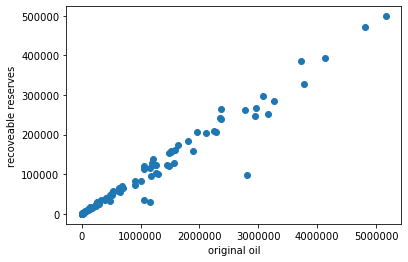

In [29]:
plt.scatter(orig_oil, rec_rev, alpha=1)
plt.xlabel('original oil')
plt.ylabel('recoveable reserves')
plt.show()

In [30]:
slope, intercept, r_value, p_value, std_err = st.linregress(orig_oil, rec_rev)

print(
    "The model parameters are, slope (b1) = "
    + str(round(slope, 2))
    + ", and the intercept (b0) = "
    + str(round(intercept, 2))
)

The model parameters are, slope (b1) = 0.09, and the intercept (b0) = -262.8


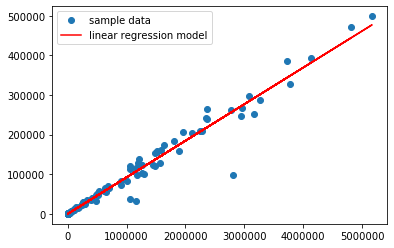

In [31]:
plt.plot(orig_oil, rec_rev, "o", label="sample data")
plt.plot(orig_oil, intercept + slope * orig_oil, "r", label="linear regression model")
plt.legend()
plt.show()

0.0779430305694312


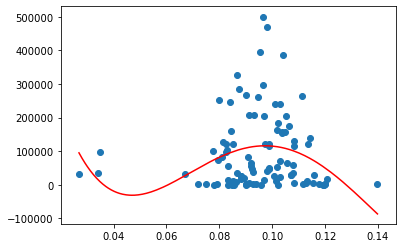

In [33]:
X = rec_fac.values.reshape(-1,1)
y = rec_rev.values.reshape(-1,1)
clf = KernelRidge(alpha=0.00000000001, kernel = "rbf")
clf.fit(X, y)
print(clf.score(X, y))
xp = np.linspace(rec_fac.min(), rec_fac.max(), 501)
yp = clf.predict(xp.reshape(-1,1))
plt.plot(xp, yp, 'r')
plt.scatter(rec_fac, rec_rev)

FileNotFoundError: [Errno 2] File b'Brisket 1-204H.csv' does not exist: b'Brisket 1-204H.csv'